In [1]:
# import necessary tools
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# read csv file, show data
stock_df = pd.read_csv("https://raw.githubusercontent.com/LyJacky/stocks/4802f4e0f139ee0568afbad309086d90c78a53b7/all_stocks_5yr.csv", parse_dates={'dt' : ['date']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
stock_df

,open,high,low,close,volume,Name
dt,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...
2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS


In [2]:
# remove other stock data
aal_df = stock_df[0:1259]

# remove unused columns
aal_df.pop("open")
aal_df.pop("low")
aal_df.pop("high")
aal_df.pop("volume")
aal_df.pop("Name")

# add past 100, 50, 30, weekly avg
aal_df.insert(0, "weekly_avg", " ")
aal_df.insert(0, "30_entry_avg", " ")
aal_df.insert(0, "50_entry_avg", " ")
aal_df.insert(0, "100_entry_avg", " ")

# see result
aal_df

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,close
dt,,,,,
2013-02-08,,,,,14.75
2013-02-11,,,,,14.46
2013-02-12,,,,,14.27
2013-02-13,,,,,14.66
2013-02-14,,,,,13.99
...,...,...,...,...,...
2018-02-01,,,,,53.88
2018-02-02,,,,,52.10
2018-02-05,,,,,49.76


In [3]:
# get rid of warnings
pd.options.mode.chained_assignment = None

# for loops to calculate avg for each column
for x in range(14, 1259):
    aal_df["weekly_avg"][x] = aal_df["close"][x-14:x-7].mean()

for x in range(37, 1259):
    aal_df["30_entry_avg"][x] = aal_df["close"][x-30-7:x-7].mean()

for x in range(57, 1259):
    aal_df["50_entry_avg"][x] = aal_df["close"][x-50-7:x-7].mean()

for x in range(107, 1259):
    aal_df["100_entry_avg"][x] = aal_df["close"][x-100-7:x-7].mean()

# remove entries w/no data, see result
aal_df = aal_df[107:1259]
aal_df

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,close
dt,,,,,
2013-07-15,16.2605,17.2224,17.116,16.388571,17.76
2013-07-16,16.2805,17.2314,17.076,16.477143,17.95
2013-07-17,16.3043,17.2392,17.039667,16.531429,18.45
2013-07-18,16.331,17.2536,16.998,16.641429,18.42
2013-07-19,16.358,17.269,16.969667,16.791429,18.23
...,...,...,...,...,...
2018-02-01,49.6466,51.1978,53.305667,57.932857,53.88
2018-02-02,49.7839,51.4362,53.552667,58.2,52.10
2018-02-05,49.8886,51.6166,53.678333,57.674286,49.76


In [5]:
# install needed packages
!pip install keras
!pip install tensorflow

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow-2.11.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp38-cp38-win_amd64.whl (266.3 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.6-cp38-cp38-win_amd64.whl (896 kB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached flatbuffers-22.11.23-py2.py3-none-any.whl (26 kB)
  Using cached grpcio-1.51.1-cp38-cp38-win_amd6

In [6]:
# import additional tools
import sys 
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [7]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [9]:
values = aal_df.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.000000   0.000000   0.005338   0.012351   0.056109  0.000585
2   0.000585   0.000259   0.004254   0.014443   0.060515  0.001281
3   0.001281   0.000484   0.003270   0.015725   0.072108  0.002061
4   0.002061   0.000900   0.002141   0.018324   0.071412  0.002851
5   0.002851   0.001344   0.001373   0.021867   0.067007  0.003780


In [16]:
# split into train and test sets
values = reframed.values

n_train_time = 691
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# Reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(691, 1, 5) (691,) (460, 1, 5) (460,)


Epoch 1/40
14/14 - 3s - loss: 0.2715 - val_loss: 0.2679 - 3s/epoch - 249ms/step
Epoch 2/40
14/14 - 0s - loss: 0.1084 - val_loss: 0.0875 - 100ms/epoch - 7ms/step
Epoch 3/40
14/14 - 0s - loss: 0.0278 - val_loss: 0.0132 - 93ms/epoch - 7ms/step
Epoch 4/40
14/14 - 0s - loss: 0.0130 - val_loss: 0.0044 - 100ms/epoch - 7ms/step
Epoch 5/40
14/14 - 0s - loss: 0.0171 - val_loss: 0.0043 - 114ms/epoch - 8ms/step
Epoch 6/40
14/14 - 0s - loss: 0.0164 - val_loss: 0.0045 - 121ms/epoch - 9ms/step
Epoch 7/40
14/14 - 0s - loss: 0.0147 - val_loss: 0.0045 - 127ms/epoch - 9ms/step
Epoch 8/40
14/14 - 0s - loss: 0.0137 - val_loss: 0.0044 - 111ms/epoch - 8ms/step
Epoch 9/40
14/14 - 0s - loss: 0.0129 - val_loss: 0.0043 - 108ms/epoch - 8ms/step
Epoch 10/40
14/14 - 0s - loss: 0.0123 - val_loss: 0.0043 - 95ms/epoch - 7ms/step
Epoch 11/40
14/14 - 0s - loss: 0.0116 - val_loss: 0.0041 - 94ms/epoch - 7ms/step
Epoch 12/40
14/14 - 0s - loss: 0.0117 - val_loss: 0.0040 - 95ms/epoch - 7ms/step
Epoch 13/40
14/14 - 0s - loss:

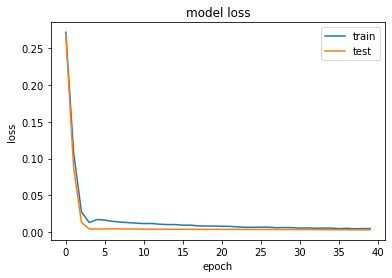

15/15 [==============================] - 1s 2ms/step
Test RMSE: 1.882


In [17]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=40, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 5))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)